In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix=pd.read_csv("netflix_titles.csv")

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.isnull().sum()/len(netflix) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# As per observations, 29-30% of directors are missing or null. Also country and cast have 9%  null values.

In [7]:
netflix.drop('director',axis=1,inplace=True)

# Using only those records which have non null value of 'date added'

In [8]:
netflix=netflix[netflix['date_added'].notna()]

In [9]:
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [10]:
netflix['rating'].fillna('TV-MA',inplace=True)

## Exploratory data analysis

### Year wise number of released movies/shows

Text(0.5, 1.0, 'Year wise release')

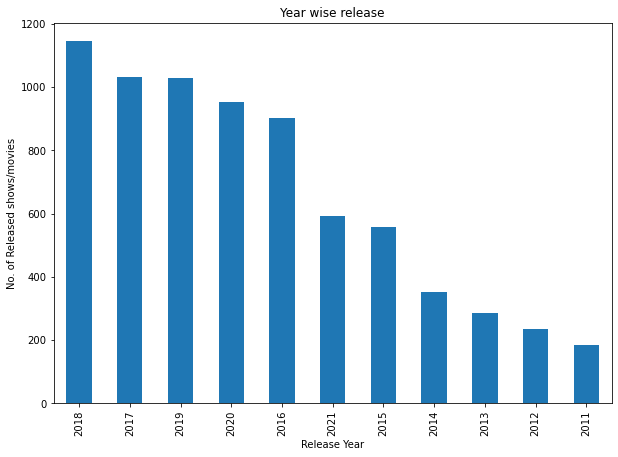

In [11]:
plt.figure()
g=netflix[netflix['release_year']>2010]['release_year'].value_counts().plot.bar(figsize=(10,7))
g.set_xlabel('Release Year')
g.set_ylabel('No. of Released shows/movies')
g.set_title('Year wise release')

Text(0.5, 1.0, 'Year wise release')

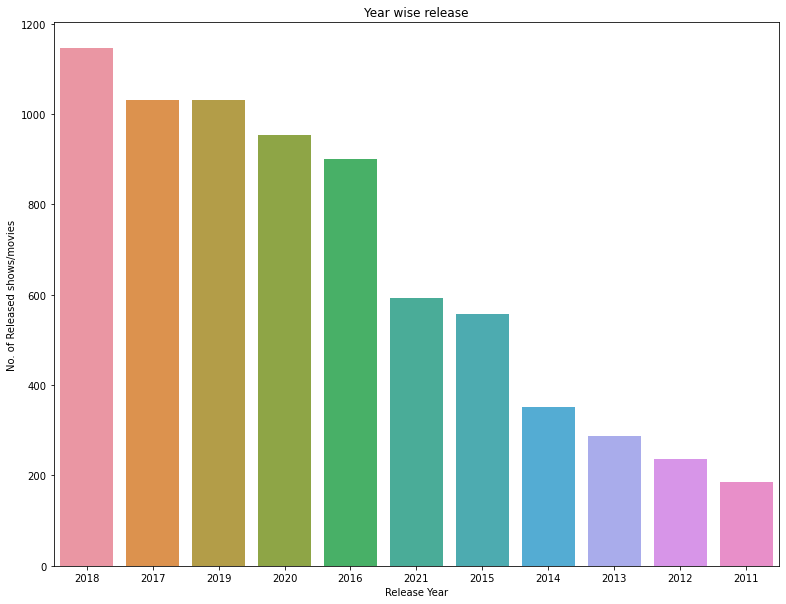

In [47]:
plt.figure(figsize=(13,10))
g=sns.countplot(x='release_year',data=netflix,order=netflix[netflix['release_year']>2010]['release_year'].value_counts().index[:])
g.set_xlabel('Release Year')
g.set_ylabel('No. of Released shows/movies')
g.set_title('Year wise release')

In [60]:
netflix[netflix['release_year']>2010]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8798,s8799,Movie,Zed Plus,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8800,s8801,TV Show,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


## Country Analysis

In [15]:
netflix['country'].value_counts()

United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

## Movies vs Shows

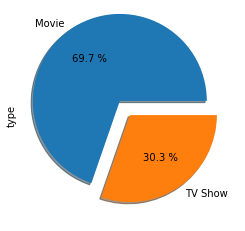

In [24]:
explode=[0.2,0]
g=netflix['type'].value_counts().plot.pie(autopct='%1.1f %%',explode=explode,shadow=True)


## Rating wise counts

Text(0.5, 1.0, 'Ratings Wise counts')

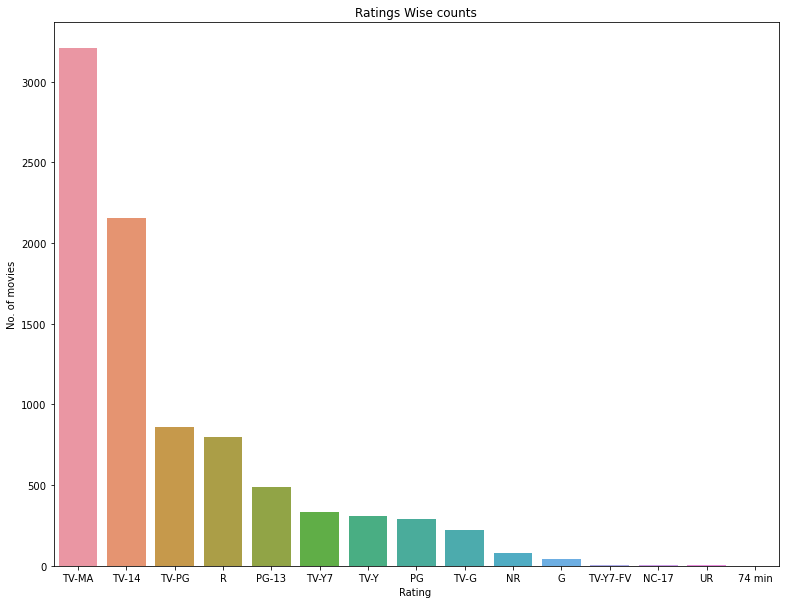

In [35]:
plt.figure(figsize=(13,10))
g=sns.countplot(x='rating',data=netflix,order=netflix['rating'].value_counts().index[0:15])
g.set_xlabel('Rating ')
g.set_ylabel('No. of movies')
g.set_title('Ratings Wise counts')

## Showing content in top 5 country wise ratings

Text(0.5, 1.0, 'TOP % COUNTRY WISE RATING')

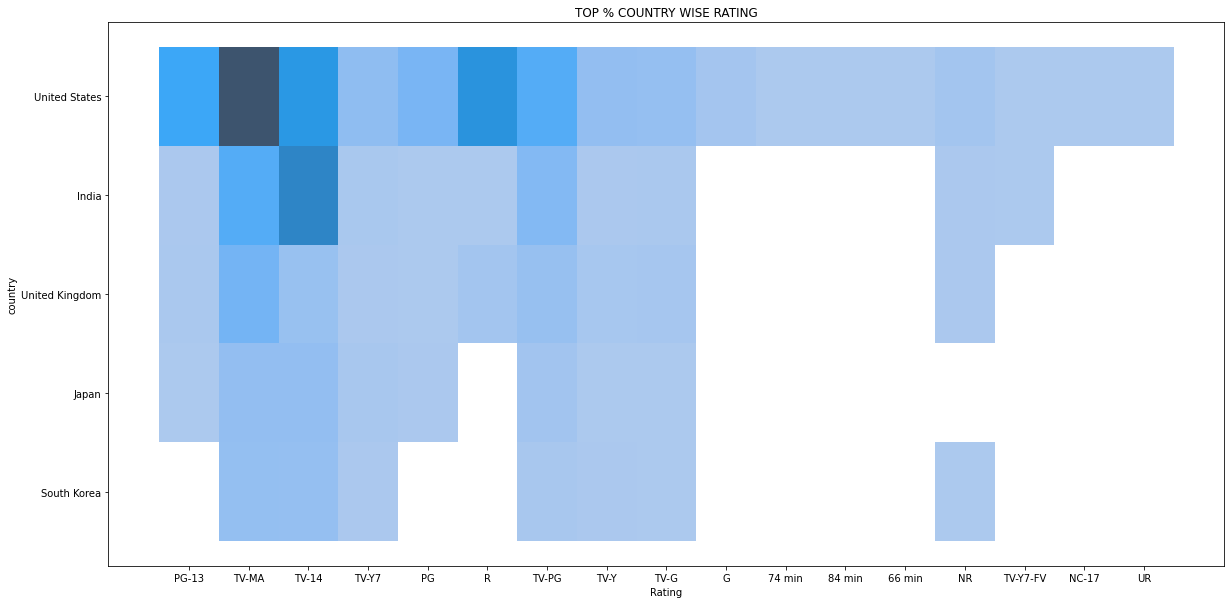

In [69]:
plt.figure(figsize=(20,10))
top_countries=netflix[netflix['country'].isin(['United States','India','United Kingdom','Japan','South Korea'])]
g=sns.histplot(x='rating',y='country',data=top_countries)
g.set_xlabel('Rating')
g.set_ylabel('country')
g.set_title('TOP % COUNTRY WISE RATING')

In [61]:
netflix[netflix['country'].isin(['United States','India','United Kingdom','Japan','South Korea'])]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Top 10 oldest movies

In [76]:
netflix[netflix['type']=='Movie'].sort_values('release_year')[0:10]['title']

7790                                      Prelude to War
8205                                The Battle of Midway
8660       Undercover: How to Operate Behind Enemy Lines
8763                     WWII: Report from the Aleutians
8739                  Why We Fight: The Battle of Russia
8419    The Memphis Belle: A Story of a\nFlying Fortress
8640                                    Tunisian Victory
8436                                   The Negro Soldier
7575                            Nazi Concentration Camps
7930                                          San Pietro
Name: title, dtype: object

In [80]:
netflix[netflix['type']=='TV Show'].sort_values('release_year')[0:10]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,United States,"February 9, 2021",1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),Rod Serling,United States,"July 1, 2017",1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
4550,s4551,TV Show,Monty Python's Fliegender Zirkus,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",1972,TV-MA,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
4551,s4552,TV Show,Monty Python's Flying Circus,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,"October 2, 2018",1974,TV-14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
6549,s6550,TV Show,Dad's Army,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,"March 31, 2018",1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
6674,s6675,TV Show,El Chavo,"Roberto Gómez Bolaños, María Antonieta de las ...",Mexico,"December 31, 2017",1979,TV-PG,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ..."
7588,s7589,TV Show,Ninja Hattori,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...


## Month wise release 

In [85]:
month=pd.to_datetime(netflix['date_added']).dt.month

In [86]:
month

0        9
1        9
2        9
3        9
4        9
        ..
8802    11
8803     7
8804    11
8805     1
8806     3
Name: date_added, Length: 8797, dtype: int64

In [88]:
netflix['month']=pd.to_datetime(netflix['date_added']).dt.month

Text(0, 0.5, 'No. of Movies/Shows released')

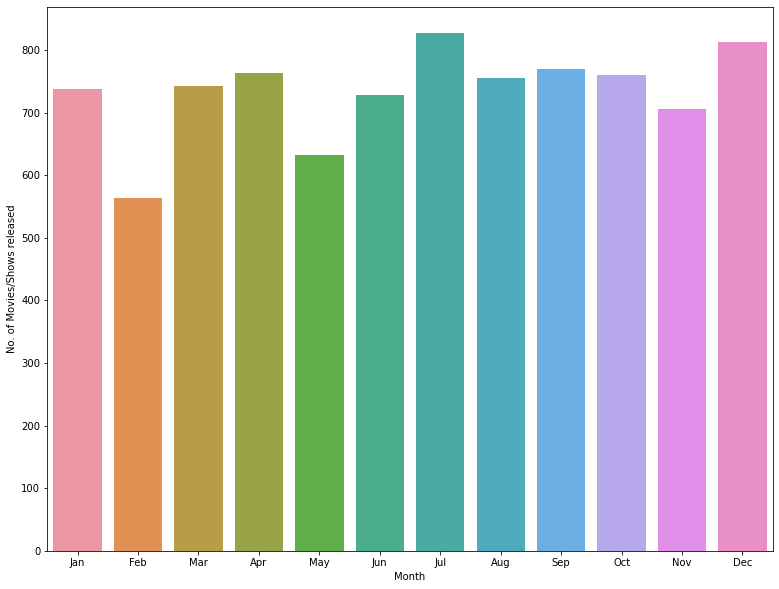

In [92]:
plt.figure(figsize=(13,10))
g=sns.countplot(x='month',data=netflix)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
g.set_xlabel('Month')
g.set_ylabel('No. of Movies/Shows released')

From this we conclude that most of the Movies/Shows are released in months of December and July